In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('/home/master/Documentos/git/irt-py/')
import tri

import importlib
importlib.reload(tri)


<module 'tri' from '/home/master/Documentos/git/irt-py/tri.py'>

In [2]:
f_microdados='./ITENS_PROVA_2022.csv'
df=pd.read_csv(f_microdados,encoding='latin1',sep=';', decimal='.')
#df=df[(df['IN_ITEM_ABAN']==0)&(df['SG_AREA']=='MT')&(df['TX_COR']=='AZUL')].drop(['IN_ITEM_ABAN', 'TX_MOTIVO_ABAN','TP_LINGUA','IN_ITEM_ADAPTADO'], axis=1)

#df=df[(df['IN_ITEM_ABAN']==0)&(df['SG_AREA']=='MT')&(df['TX_COR']=='AZUL')&(df['CO_PROVA']==1211)].drop(['IN_ITEM_ABAN', 'TX_MOTIVO_ABAN','TP_LINGUA','IN_ITEM_ADAPTADO'], axis=1)
df=df[(df['IN_ITEM_ABAN']==0)&(df['SG_AREA']=='MT')&(df['TX_COR']=='AZUL')&(df['CO_PROVA']==1075)].drop(['IN_ITEM_ABAN', 'TX_MOTIVO_ABAN','TP_LINGUA','IN_ITEM_ADAPTADO'], axis=1)

df.head(46)


,CO_POSICAO,SG_AREA,CO_ITEM,TX_GABARITO,CO_HABILIDADE,NU_PARAM_A,NU_PARAM_B,NU_PARAM_C,TX_COR,CO_PROVA
855,136,MT,97590,E,25,2.33252,2.40899,0.14217,AZUL,1075
856,180,MT,10409,E,6,1.66982,2.03629,0.24595,AZUL,1075
857,179,MT,85588,B,24,2.30031,0.46698,0.25799,AZUL,1075
858,178,MT,19807,E,12,4.15830,2.56697,0.06542,AZUL,1075
859,177,MT,95676,A,26,1.32325,0.64802,0.18728,AZUL,1075
860,176,MT,117886,D,9,0.44430,6.27505,0.12510,AZUL,1075
861,175,MT,60441,E,1,1.42701,-0.02398,0.11013,AZUL,1075
862,174,MT,14797,D,8,2.93886,2.57768,0.12028,AZUL,1075
863,173,MT,30327,D,25,2.81078,0.63977,0.16335,AZUL,1075
864,172,MT,117742,B,13,0.65574,2.58862,0.16510,AZUL,1075


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 855 to 899
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO_POSICAO     43 non-null     int64  
 1   SG_AREA        43 non-null     object 
 2   CO_ITEM        43 non-null     int64  
 3   TX_GABARITO    43 non-null     object 
 4   CO_HABILIDADE  43 non-null     int64  
 5   NU_PARAM_A     43 non-null     float64
 6   NU_PARAM_B     43 non-null     float64
 7   NU_PARAM_C     43 non-null     float64
 8   TX_COR         43 non-null     object 
 9   CO_PROVA       43 non-null     int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 3.7+ KB


In [4]:
examParameters=df[['NU_PARAM_A','NU_PARAM_B','NU_PARAM_C']].copy()
examParameters.reset_index(drop=True, inplace=True)
examParameters['c']=examParameters['NU_PARAM_C']
examParameters['a']=examParameters['NU_PARAM_A']
examParameters['b']=examParameters['NU_PARAM_B']


In [5]:
def random_hits(shape,N):
    vetor= np.asarray([1]*(N)+[0]*(shape-N))
    np.random.shuffle(vetor)
    return vetor

def get_Probable_Hits(a,b,c,theta=0):
    hits=[]
    for k in range(len(a)):
        p=tri.logistic_model(theta,a[k],b[k],c[k])
        x=np.random.binomial(1, p, size=1)[0]
        hits.append(x)
    return hits




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 855 to 899
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO_POSICAO     43 non-null     int64  
 1   SG_AREA        43 non-null     object 
 2   CO_ITEM        43 non-null     int64  
 3   TX_GABARITO    43 non-null     object 
 4   CO_HABILIDADE  43 non-null     int64  
 5   NU_PARAM_A     43 non-null     float64
 6   NU_PARAM_B     43 non-null     float64
 7   NU_PARAM_C     43 non-null     float64
 8   TX_COR         43 non-null     object 
 9   CO_PROVA       43 non-null     int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 3.7+ KB


# Vamos ver a estimativa de notas ao longo da prova

Ciências Naturais

In [18]:

#hits=randomHits(len(df),30)
hidden_theta=2
hits=get_Probable_Hits(examParameters['a'],examParameters['b'],examParameters['c'],theta=hidden_theta)
#hits



In [21]:
number_of_questions_vec=[]
ability_hat_vec=[]
for k in range(1,len(df)):
    student=tri.Student(responses=hits[:k],parameters=examParameters.head(k))
    student.calculate_ability(method='EAP',scale_prior=1.5)
    number_of_questions_vec.append(k)
    ability_hat_vec.append(student.ability)

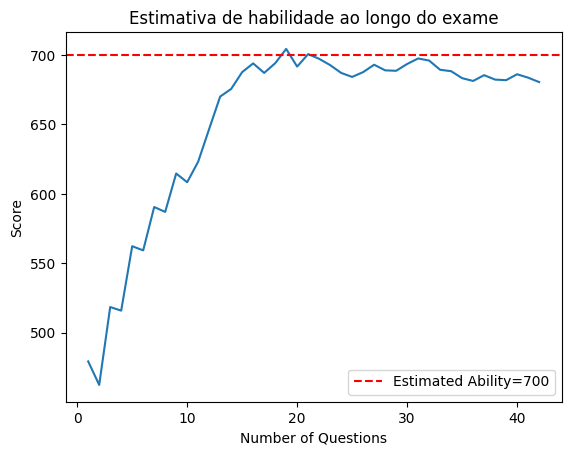

In [22]:
plt.plot(number_of_questions_vec,500+100*np.asarray(ability_hat_vec))


# Configurações adicionais
plt.title('Estimativa de habilidade ao longo do exame')
plt.axhline(y=500 + 100 * hidden_theta, color='red', linestyle='--', label='Estimated Ability='+str(500+100*hidden_theta))
plt.xlabel('Number of Questions')
plt.ylabel('Score')
plt.legend()



